MNS CP Exercise 02
</br>
Bramantyo Ibrahim Supriyatno

In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
np.random.seed(10)

In [4]:
def init_weights(S):
    num_patterns = S.shape[1]
    
    W = np.zeros((S.shape[0],S.shape[0]))
    
    for i in range (num_patterns):
        s = S[:,[i]]
        w = np.dot(s,s.T)
        W +=w
    np.fill_diagonal(W, 0)
    return W

In [5]:
def compute_energy(W,s):
    return -np.sum(np.multiply(W, np.dot(s,s.T)))

In [6]:
def update_states(W, s):
    s_1 = np.dot(W, s)
    s_1 = np.sign(s_1)
    e = compute_energy(W,s_1)
    return s_1, e

In [7]:
def update_states_until_converge(W,s):
    should_update = True
    updated_1 = s.copy()
    
    e_s = [compute_energy(W,s)]
    s_s = [s]
    while should_update:
        updated, energy = update_states(W, updated_1)
        e_s.append(energy)
        s_s.append(updated)
        if (updated_1==updated).all():
            should_update=False
        else:
            updated_1 = updated.copy()        
    stability = (s_s[0]==s_s[-1]).all()
    return s_s, e_s, stability

In [8]:
S = np.array([
    [ 1,-1, 1,-1],
    [-1, 1, 1, 1],
    [ 1, 1, 1,-1]]
).T

# Task 1 & Task 2

In [9]:
result_weights=init_weights(S)
print(result_weights)

[[ 0. -1.  1. -1.]
 [-1.  0. -1.  1.]
 [ 1. -1.  0. -1.]
 [-1.  1. -1.  0.]]


pattern 1 is stable
and converges to 
[ 1. -1.  1. -1.]


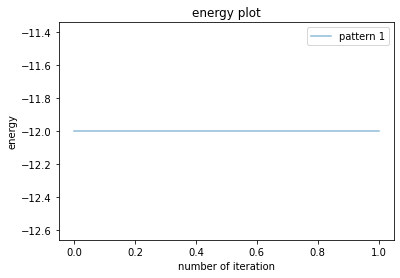

In [10]:
for i in range(S.shape[1]):
    s = S[:,[i]]
    states, energys, stability = update_states_until_converge(result_weights, s)
    
    if stability:
        print('pattern {} is stable'.format(i+1))
    else:
        
        print('pattern {} is not stable'.format(i+1))
    print('and converges to '.format(i+1))
    print(states[-1].ravel())
    
    plt.plot(energys, label='pattern {}'.format(i+1), alpha=0.5)
    
plt.title('energy plot')
plt.xlabel('number of iteration')
plt.ylabel('energy')
plt.legend()
plt.show()        

only pattern one is converging to the same initial states. It is also shown that pattern 1 does not have changes in energy, while the others have

# Task 3

In [11]:
images = np.load('images.npz')['arr_0']
ori_shape = images.shape

In [12]:
reshaped = images.reshape((8,-1)).T

In [13]:
init_w_2 = init_weights(reshaped)

In [14]:
for i in range(reshaped.shape[1]):
    image = reshaped[:,[i]]
    states, energys, stability = update_states_until_converge(init_w_2, image)
    
    if stability:
        print('pattern {} is stable'.format(i+1))
    else:        
        print('pattern {} is not stable'.format(i+1))

pattern 1 is stable
pattern 2 is stable
pattern 3 is not stable
pattern 4 is stable
pattern 5 is stable
pattern 6 is stable
pattern 7 is stable
pattern 8 is stable


<b>Random Pattern 1</b>

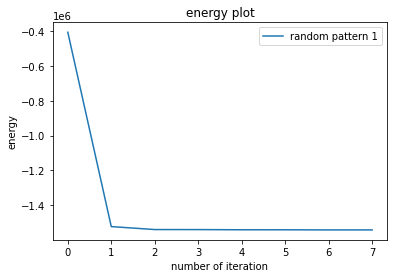

In [15]:
random = np.random.choice([-1,1],(reshaped.shape[0],1),p=[0.1,0.9])

states, energys, stability = update_states_until_converge(init_w_2, random)

plt.plot(energys, label='random pattern 1')
plt.title('energy plot')
plt.xlabel('number of iteration')
plt.ylabel('energy')
plt.legend()
plt.show()

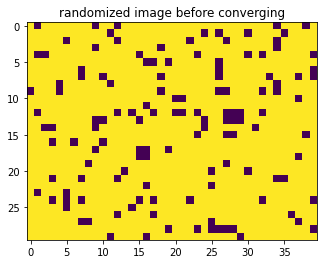

In [16]:
image_init = states[0].reshape(ori_shape[1],ori_shape[2])
image_init.shape
plt.imshow(image_init)
plt.title('randomized image before converging')
plt.show()

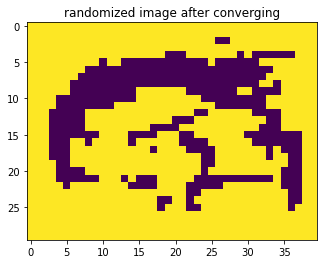

In [17]:
image_init = states[-1].reshape(ori_shape[1],ori_shape[2])
image_init.shape
plt.title('randomized image after converging')
plt.imshow(image_init)
plt.show()

<b>Random Pattern 2</b>

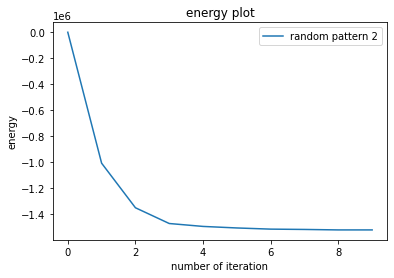

In [18]:
random = np.random.choice([-1,1],(reshaped.shape[0],1),p=[0.5,0.5])

states, energys, stability = update_states_until_converge(init_w_2, random)

plt.plot(energys, label='random pattern 2')
plt.title('energy plot')
plt.xlabel('number of iteration')
plt.ylabel('energy')
plt.legend()
plt.show()

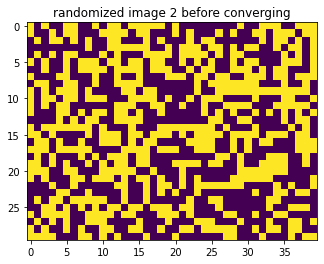

In [19]:
image_init = states[0].reshape(ori_shape[1],ori_shape[2])
image_init.shape
plt.imshow(image_init)
plt.title('randomized image 2 before converging')
plt.show()

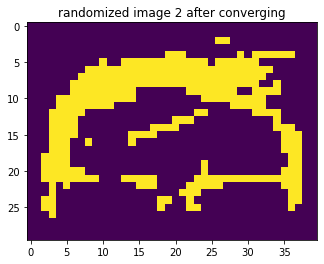

In [20]:
image_init = states[-1].reshape(ori_shape[1],ori_shape[2])
plt.title('randomized image 2 after converging')
plt.imshow(image_init)
plt.show()

<b>Pattern 2 + Noise</b>

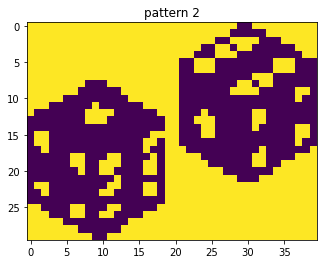

In [21]:
# copying from pattern 2
pattern_1_c = reshaped[:,[0]]

plt.title('pattern 2')
plt.imshow(pattern_1_c.reshape(ori_shape[1],ori_shape[2]))
plt.show()

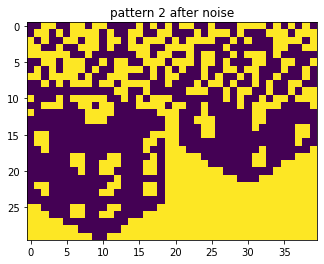

In [22]:
p_change = 0.4
len_change = int(pattern_1_c.shape[0] *p_change)
random = np.random.choice([-1,1],(len_change,1),p=[0.5,0.5])
pattern_1_c[:len_change,:] = random
plt.imshow(pattern_1_c.reshape(ori_shape[1],ori_shape[2]))
plt.title('pattern 2 after noise')
plt.show()

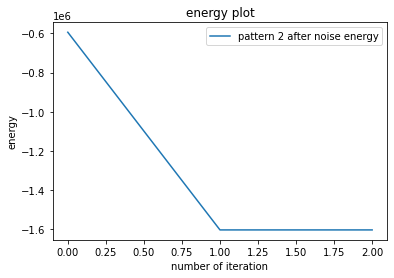

In [23]:
states, energys, stability = update_states_until_converge(init_w_2, pattern_1_c)

plt.plot(energys, label='pattern 2 after noise energy')
plt.title('energy plot')
plt.xlabel('number of iteration')
plt.ylabel('energy')
plt.legend()
plt.show()

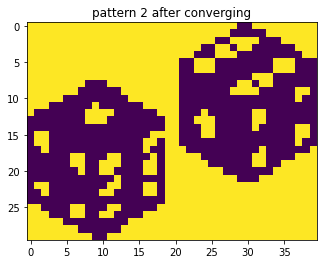

In [24]:
image_init = states[-1].reshape(ori_shape[1],ori_shape[2])
image_init.shape
plt.imshow(image_init)
plt.title('pattern 2 after converging')
plt.show()